In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns


In [28]:
df = pd.read_csv ('/home/amh001/work_fs7/DATA/LINEP/LineP_for_Data_Synthesis_1990-2019_v1.csv')


In [36]:
df[df==-999]=np.nan
df['CTDTMP_ITS90_DEG_C'].count()

4508

In [32]:
# How many total rows?
print(df.shape)

# Check non-null counts for TDTMP_ITS90_DEG_C
print(df['CTDTMP_ITS90_DEG_C'].count())

# Check unique years and months
print(df['YEAR_UTC'].unique())
print(df['MONTH_UTC'].unique())

(4983, 47)
4508
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2010 2014 2013 2015 2016 2017 2018 2019]
[ 5  8  9 10  2  3  6]


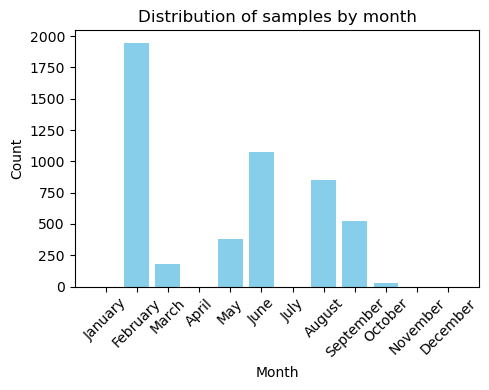

In [33]:
from collections import Counter
# Extract month names
months =df.MONTH_UTC

# Count the occurrences of each month
# Count occurrences of each month
month_counts = Counter(months)
# Prepare month names for plotting
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Sort months based on the natural order (1 - 12)
sorted_months = [month_names[i - 1] for i in range(1, 13)]
sorted_counts = [month_counts.get(i, 0) for i in range(1, 13)]

# Plot
plt.figure(figsize=(5, 4))
plt.bar(sorted_months, sorted_counts, color='skyblue')
plt.title('Distribution of samples by month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

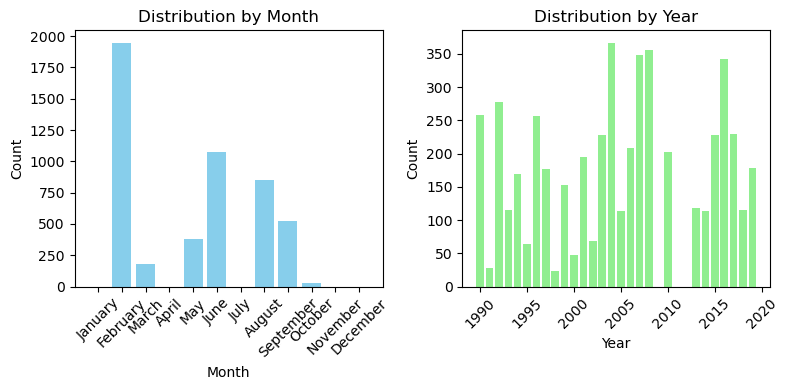

In [34]:

months =df.MONTH_UTC
years =df.YEAR_UTC

# Count occurrences
month_counts = Counter(months)
year_counts = Counter(years)

# Prepare labels
month_names = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
sorted_months = [month_names[i - 1] for i in range(1, 13)]
sorted_month_counts = [month_counts.get(i, 0) for i in range(1, 13)]

sorted_years = sorted(year_counts.keys())
sorted_year_counts = [year_counts[y] for y in sorted_years]

# Plot both distributions
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Monthly distribution
axs[0].bar(sorted_months, sorted_month_counts, color='skyblue')
axs[0].set_title('Distribution by Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Count')
axs[0].tick_params(axis='x', rotation=45)

# Yearly distribution
axs[1].bar(sorted_years, sorted_year_counts, color='lightgreen')
axs[1].set_title('Distribution by Year')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [27]:
print(df[column])

0        0.0
1        0.0
2        0.0
3       13.4
4       11.2
        ... 
4978    40.3
4979    38.8
4980    37.7
4981    37.1
4982    36.9
Name: NITRATE_NITRITE_UMOL_KG, Length: 4983, dtype: float64


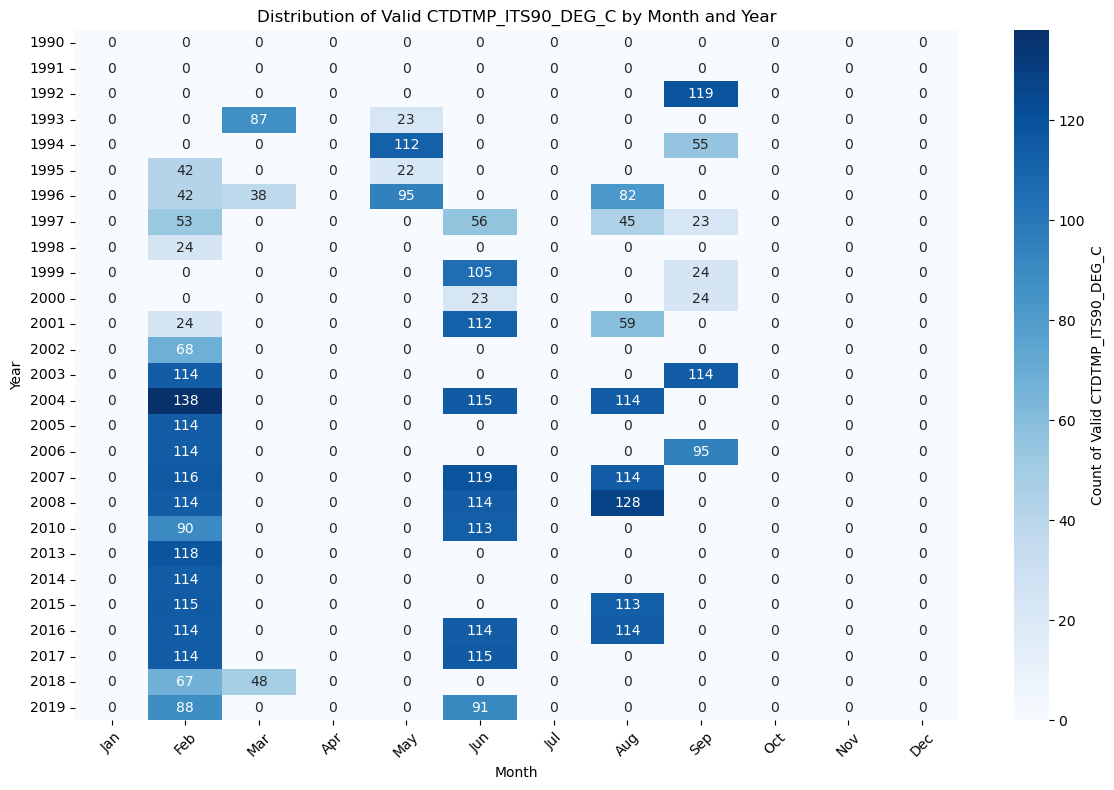

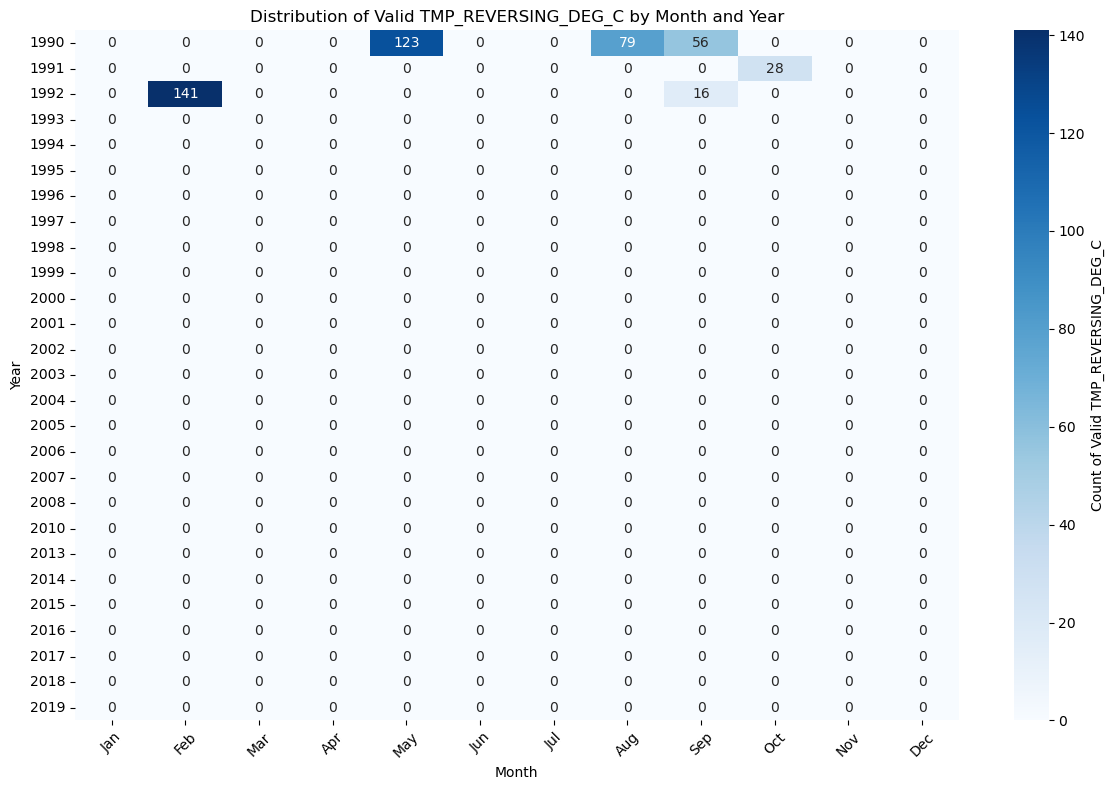

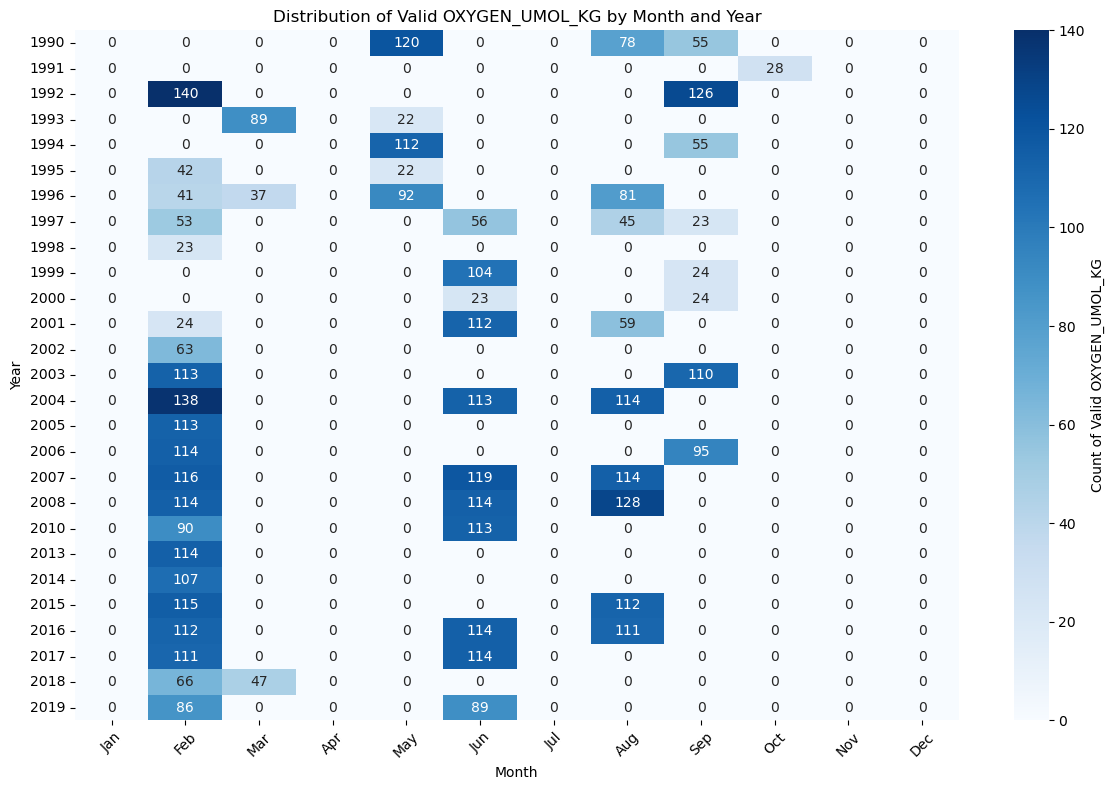

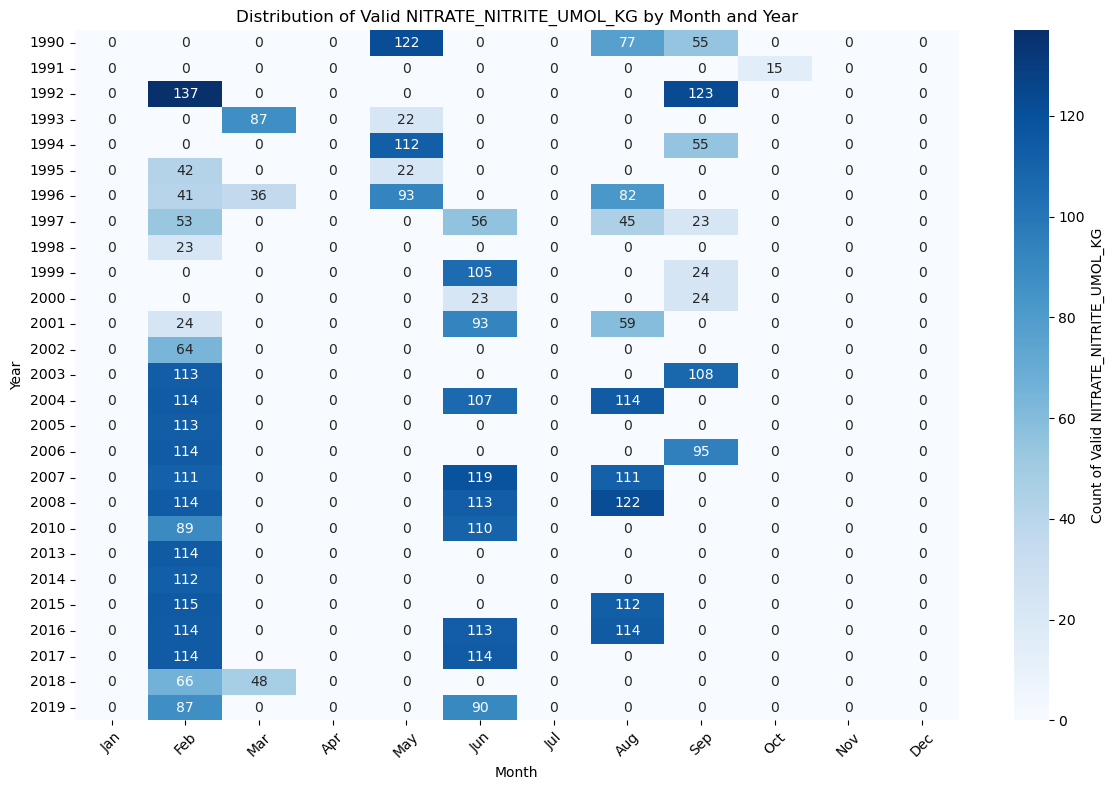

In [38]:
# Ensure all months are represented
def create_full_heatmap(df, column):
    # Group by year and month, count non-null values
    counts = df.groupby(['YEAR_UTC', 'MONTH_UTC'])[column].count().unstack(fill_value=0)
    
    # Ensure all months (1-12) are present
    counts = counts.reindex(columns=range(1, 13), fill_value=0)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(counts, cmap='Blues', annot=True, fmt='d',
                cbar_kws={'label': f'Count of Valid {column}'})
    
    plt.title(f'Distribution of Valid {column} by Month and Year')
    plt.xlabel('Month')
    plt.ylabel('Year')
    plt.xticks(ticks=[i + 0.5 for i in range(12)],
               labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
               rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    #plt.savefig(f'heatmap_{column}_valid_count_2.png', format='png', bbox_inches='tight', transparent=False, dpi=150)
    plt.close()

# Example usage for multiple columns
columns_to_plot = ['CTDTMP_ITS90_DEG_C' ,'TMP_REVERSING_DEG_C', 'OXYGEN_UMOL_KG', 'NITRATE_NITRITE_UMOL_KG']

for column in columns_to_plot:
    create_full_heatmap(df, column)